# Example Linking Option **Fixed Operations**
This is an implementation example showing the *fixed operations* linking method.

![](operations.png)

The figure above illustrates the interaction between the client and a Fair Digital Object via an interactive Jupyter Notebook. Here, the digital object is a catalog, which contains various climate model runs.

In [1]:
# Import packages for opening the FDO Record JSON file
import json
import importlib

## Read FDO Record

In [2]:
# Opening the FDO Record JSON file
f = open('catalog_FDO.json')

# Returns JSON object as a dictionary
fdo_rec = json.load(f)

In [3]:
# This is what the FDO Record looks like
fdo_rec

{'header': {'CONTENT_TYPE': 'Catalog',
  'SUBTYPE': 'Climate Model Output',
  'FDO-PROFILE': 'https://www.dummy-url.de/link-to-fdo-profile',
  'ENTRY_NAME': 'nextGEMS: Catalogs of full output of the production simulations for ICON and IFS',
  'CREATION_DATE': '2024-04-08',
  'AUTHORS': 'Wieners, Karl-Hermann; Rackow, Thomas; Aguridan, Razvan; Becker, Tobias; Beyer, Sebastian; Cheedela, Suvarchal Kumar; Dreier, Nils-Arne; Engels, Jan Frederik; Esch, Monika; Frauen, Claudia; Klocke, Daniel; Kölling, Tobias; Pedruzo-Bagazgoitia, Xabier; Putrasahan, Dian;Schnur, Reiner; Sidorenko, Dmitry; Stevens, Bjorn; Zimmermann, Janos',
  'PERSISTENT_ID': 'doi:10.35095/WDCC/nextGEMS_prod_addinfov1',
  'DOWNLOAD': 'https://www.wdc-climate.de/ui/cerarest/addinfoDownload/nextGEMS_prod_addinfov1/nextGEMS_prod.yaml'},
 'coverages': {'MIN_LAT': '-90',
  'MAX_LAT': '90',
  'MIN_LON': '-180',
  'MAX_LON': '180',
  'MIN_ALTITUDE': '0',
  'MAX_ALTITUDE': '0',
  'START_YEAR': 2020,
  'START_MONTH': 1,
  'START_DA

## Read Operations

From the FDO Record read the module, location of the bit sequence and operations.

In [4]:
# The software needed to process the bit-sequence behind the FDO
module = importlib.import_module(fdo_rec['language']['MODULE'])

In [5]:
# The location of the bit-sequence
location = fdo_rec['header']['DOWNLOAD']

In [6]:
# The command to perform the OPEN operation
op_open = fdo_rec['operations']['OPEN']

In [7]:
# The command to perform the READ operation
op_read = fdo_rec['operations']['READ']

## Open Catalog (Bit-Sequence)

In [8]:
# Open the catalog by using the key-value pairs, which are given in the FDO record
catalog = getattr(module, op_open)(location)

In [9]:
# List the content of the catalog
list(catalog)

['ICON.ngc4008',
 'IFS.IFS_9-FESOM_5-production.2D_daily_healpix128_ocean',
 'IFS.IFS_9-FESOM_5-production.2D_daily_healpix512_ocean',
 'IFS.IFS_9-FESOM_5-production.2D_hourly_healpix128',
 'IFS.IFS_9-FESOM_5-production.2D_hourly_healpix512',
 'IFS.IFS_9-FESOM_5-production.2D_hourly_healpix512_2020s',
 'IFS.IFS_9-FESOM_5-production.2D_hourly_healpix512_2030s',
 'IFS.IFS_9-FESOM_5-production.2D_hourly_healpix512_2040s',
 'IFS.IFS_9-FESOM_5-production.2D_monthly_0.25deg',
 'IFS.IFS_9-FESOM_5-production.2D_monthly_0.25deg_snow',
 'IFS.IFS_9-FESOM_5-production.2D_monthly_0.25deg_sst_ci_winds',
 'IFS.IFS_9-FESOM_5-production.2D_monthly_healpix512',
 'IFS.IFS_9-FESOM_5-production.2D_monthly_healpix512_sst_ci_winds',
 'IFS.IFS_9-FESOM_5-production.3D_daily_healpix128_ocean',
 'IFS.IFS_9-FESOM_5-production.3D_daily_healpix512_ocean',
 'IFS.IFS_9-FESOM_5-production.3D_hourly_0.25deg_2020s',
 'IFS.IFS_9-FESOM_5-production.3D_hourly_0.25deg_2030s',
 'IFS.IFS_9-FESOM_5-production.3D_hourly_0.25deg

## Choose a Dataset

In [10]:
# Let the client choose a dataset
ds_name = 'ICON.ngc4008'

## Read Dataset

In [11]:
# Read the catalog by using the key-value pairs, which are given in the FDO record
dataset = getattr(catalog[ds_name], op_read)()

In [12]:
dataset

<xarray.Dataset>
Dimensions:                              (time: 10958, depth_half: 73,
                                          cell: 12, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 nan
  * depth_full                           (depth_full) float32 1.0 ... 5.816e+03
  * depth_half                           (depth_half) float32 nan ... 5.951e+03
  * level_full                           (level_full) float64 1.0 2.0 ... 90.0
  * level_half                           (level_half) float64 1.0 2.0 ... 91.0
  * soil_depth_energy_level              (soil_depth_energy_level) float32 0....
  * soil_depth_water_level               (soil_depth_water_level) float32 0.0...
  * time                                 (time) datetime64[ns] 2020-01-02 ......
Dimensions without coordinates: cell
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, cell) float32 ...
    FrshFlux_IceSalt                     (time, cell) float32 ...
    FrshFlux_TotalIce                    (time, cell) float32 ...
    Qbot                                 (time, cell) float32 ...
    Qtop                                 (time, cell) float32 ...
    Wind_Speed_10m                       (time, cell) float32 ...
    ...                                   ...
    vas                                  (time, cell) float32 ...
    w                                    (time, depth_half, cell) float32 ...
    wa_phy                               (time, level_half, cell) float32 ...
    zg                                   (level_full, cell) float32 ...
    zghalf                               (level_half, cell) float32 ...
    zos                                  (time, cell) float32 ...

## Close FDO Record

In [13]:
# Close the FDO record (just Python housekeeping)
f.close()

## Create Provenance Information
This section gives an example how the workflow can be tracked and provenance information can be preserved.

In [14]:
from prov.model import ProvDocument

In [15]:
# Create a new provenance document
doc = ProvDocument()

### Add Namespaces

In [16]:
doc.add_namespace('software','python package')
doc.add_namespace('project', 'agent')
doc.add_namespace('operator', 'task')
doc.add_namespace('input', 'Type and Name')
doc.add_namespace('output', 'type and name')
doc.add_namespace('attribute', 'variable name')

<Namespace: attribute {variable name}>

### Define Software

In [17]:
software = doc.entity('software:'+fdo_rec['language']['DOKU'])

### Define Project

In [18]:
project_fdo= doc.agent('project:Fixed Operations Example')

### Define Datasets

In [19]:
ds_0 = doc.entity('input: nextGEMS_prod.yaml')

### Define Operations

In [20]:
op_open = doc.activity('operator:'+str(op_open))
op_read = doc.activity('operator:'+str(op_read))

### Run Unit Operator

In [21]:
doc.start(op_open, starter=software, trigger=project_fdo)

<ProvStart: (operator:open_catalog, project:Fixed Operations Example)>

In [22]:
# visualize file content
output1 = doc.entity('output: NextGEMS Catalog')
doc.wasDerivedFrom(output1, ds_0, activity=op_open)

<ProvDerivation: (output: NextGEMS Catalog, input: nextGEMS_prod.yaml)>

In [23]:
output2 = doc.entity('output: Dataset')
doc.wasDerivedFrom(output2, output1, activity=op_read)

<ProvDerivation: (output: Dataset, output: NextGEMS Catalog)>

### Show Provenance

In [24]:
print(doc.get_provn())

document
  prefix software <python package>
  prefix project <agent>
  prefix operator <task>
  prefix input <Type and Name>
  prefix output <type and name>
  prefix attribute <variable name>
  
  entity(software:Python Intake (https://github.com/intake/intake))
  agent(project:Fixed Operations Example)
  entity(input: nextGEMS_prod.yaml)
  activity(operator:open_catalog, -, -)
  activity(operator:to_dask, -, -)
  wasStartedBy(operator:open_catalog, project:Fixed Operations Example, software:Python Intake (https://github.com/intake/intake), -)
  entity(output: NextGEMS Catalog)
  wasDerivedFrom(output: NextGEMS Catalog, input: nextGEMS_prod.yaml, operator:open_catalog, -, -)
  entity(output: Dataset)
  wasDerivedFrom(output: Dataset, output: NextGEMS Catalog, operator:to_dask, -, -)
endDocument


## Visualization as PNG

In [25]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("prov.png")

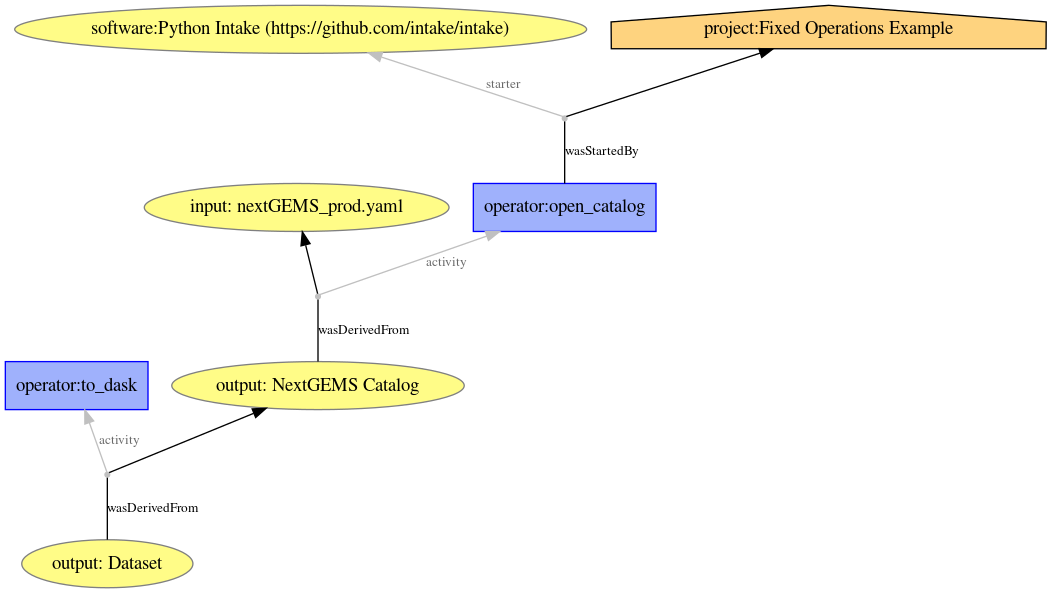

In [26]:
from IPython.display import Image
Image("prov.png")

## JSON Export

In [27]:
doc.serialize('prov.yml')

---
# Challenges
- At what point do we seperate infrastructural from analytical operations?
- How preserve provenance information?
- How handle the use case of many operations? Might a central registry be the better option?